# MACHINE LEARNING: Aplicaciones con scikit-learn



**Victor Fica León**

# Visualización de los datos

**Analisis exploratorio de datos**

- Gráfico de cajas
- Gráfico de dispersión
- Histogramas 


# Ejemplo aplicación en Iris Dataset

Conjunto de datos con **150 muestras**

**4 atributos** medidos a cada muestra

**3 especies de Iris** Setosa,Versicolor, Virginica
<div class="stretch"><img src="../images/Iris-data.png" width=900%/></div>

In [1]:
%matplotlib inline


import seaborn; seaborn.set()
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


/home/Vilion/miniconda3/envs/test/lib/python3.6/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
class_names = iris.target_names

In [3]:
print(iris.data.shape)
print(iris.data[0:5]) 

(150, 4)
[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]]


In [4]:
print("0=Setosa, 1=Versicolor, 2=Virginica\n")
print(iris.target)

0=Setosa, 1=Versicolor, 2=Virginica

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


/home/Vilion/miniconda3/envs/test/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


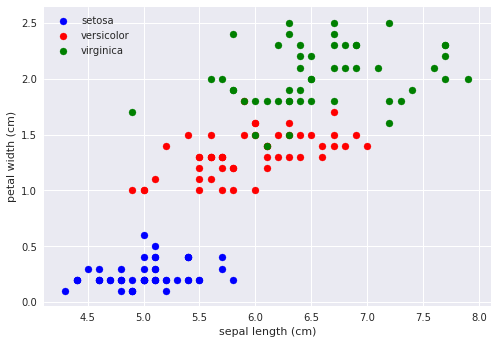

In [5]:
x_index = 0
y_index = 3

colors = ['blue', 'red', 'green']

for label, color in zip(range(len(iris.target_names)), colors):
    plt.scatter(iris.data[iris.target==label, x_index], 
                iris.data[iris.target==label, y_index],
                label=iris.target_names[label],
                c=color)
    

plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])
plt.legend(loc='upper left')
plt.show()


/home/Vilion/miniconda3/envs/test/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


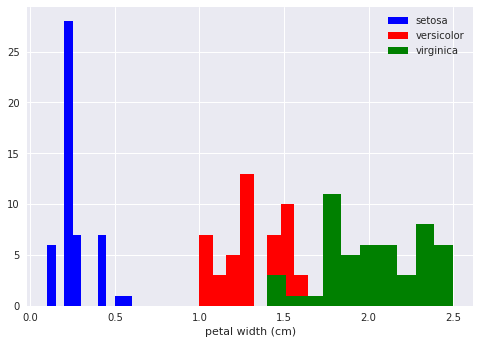

In [6]:
x_index = 3
colors = ['blue', 'red', 'green']

for label, color in zip(range(len(iris.target_names)), colors):
    plt.hist(iris.data[iris.target==label, x_index], 
             label=iris.target_names[label],
             color=color)

plt.xlabel(iris.feature_names[x_index])
plt.legend(loc='upper right')
plt.show()

## Diagrama de dispersion con Seaborn y Pandas

/home/Vilion/miniconda3/envs/test/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


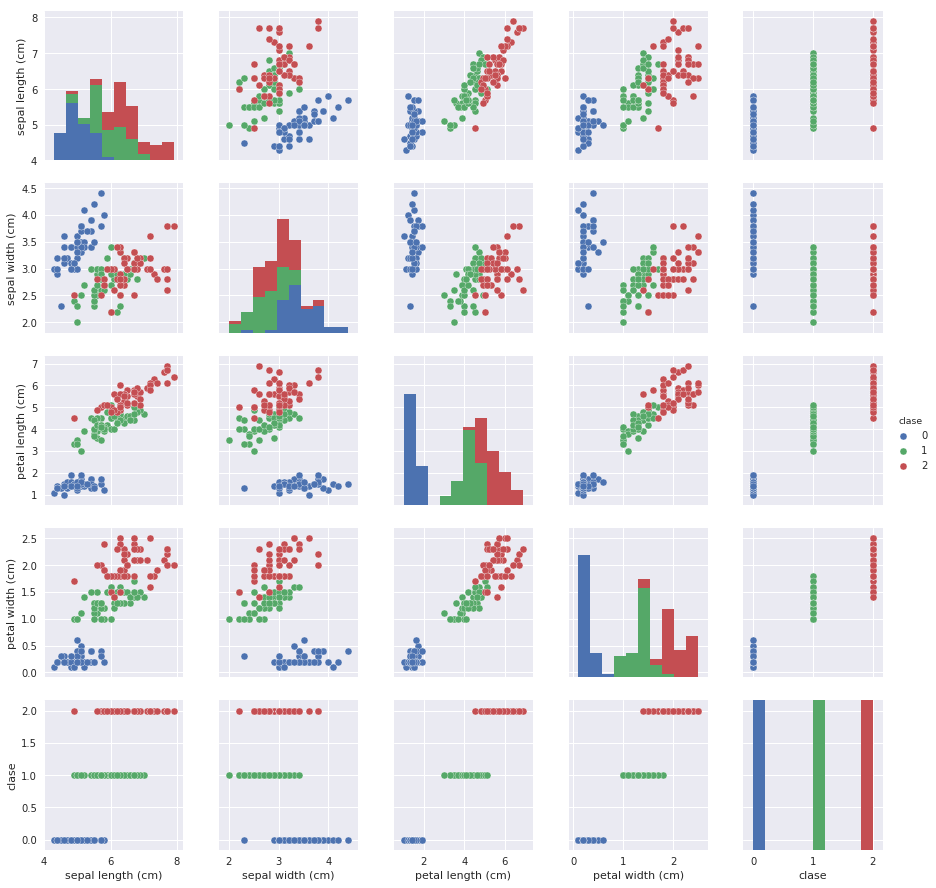

In [7]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df["clase"] = iris.target
g = seaborn.pairplot(iris_df,hue="clase")

# Trabajando con Datos Reales

## Modelo de Regresion Lineal
P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
Modeling wine preferences by data mining from physicochemical properties.
In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.
In the above reference, two datasets were created, using red and white wine samples.
The inputs include objective tests (e.g. PH values) and the output is based on sensory data
(median of at least 3 evaluations made by wine experts). Each expert graded the wine quality 
between 0 (very bad) and 10 (very excellent). Several data mining methods were applied to model
these datasets under a regression approach. The support vector machine model achieved the
best results. Several metrics were computed: MAD, confusion matrix for a fixed error tolerance (T),
etc. Also, we plot the relative importances of the input variables (as measured by a sensitivity
analysis procedure).
  
http://archive.ics.uci.edu/ml/datasets/Wine+Quality
  
Attribute information:

Input variables (based on physicochemical tests):
- 1 fixed acidity
- 2 volatile acidity
- 3 citric acid
- 4 residual sugar
- 5 chlorides
- 6 free sulfur dioxide
- 7 total sulfur dioxide
- 8 density
- 9 pH
- 10 sulphates
- 11 alcohol

**Output variable (based on sensory data):**

- 12 quality (score between 0 and 10)

In [8]:
# Desde la url
#url= "http://mlr.cs.umass.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
#data= pd.read_csv(url)

# Usando la data local
data = pd.read_csv("winequality-red.csv",sep=";")
data.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [9]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [10]:
data.shape

(1599, 12)

In [11]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


/home/Vilion/miniconda3/envs/bio/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


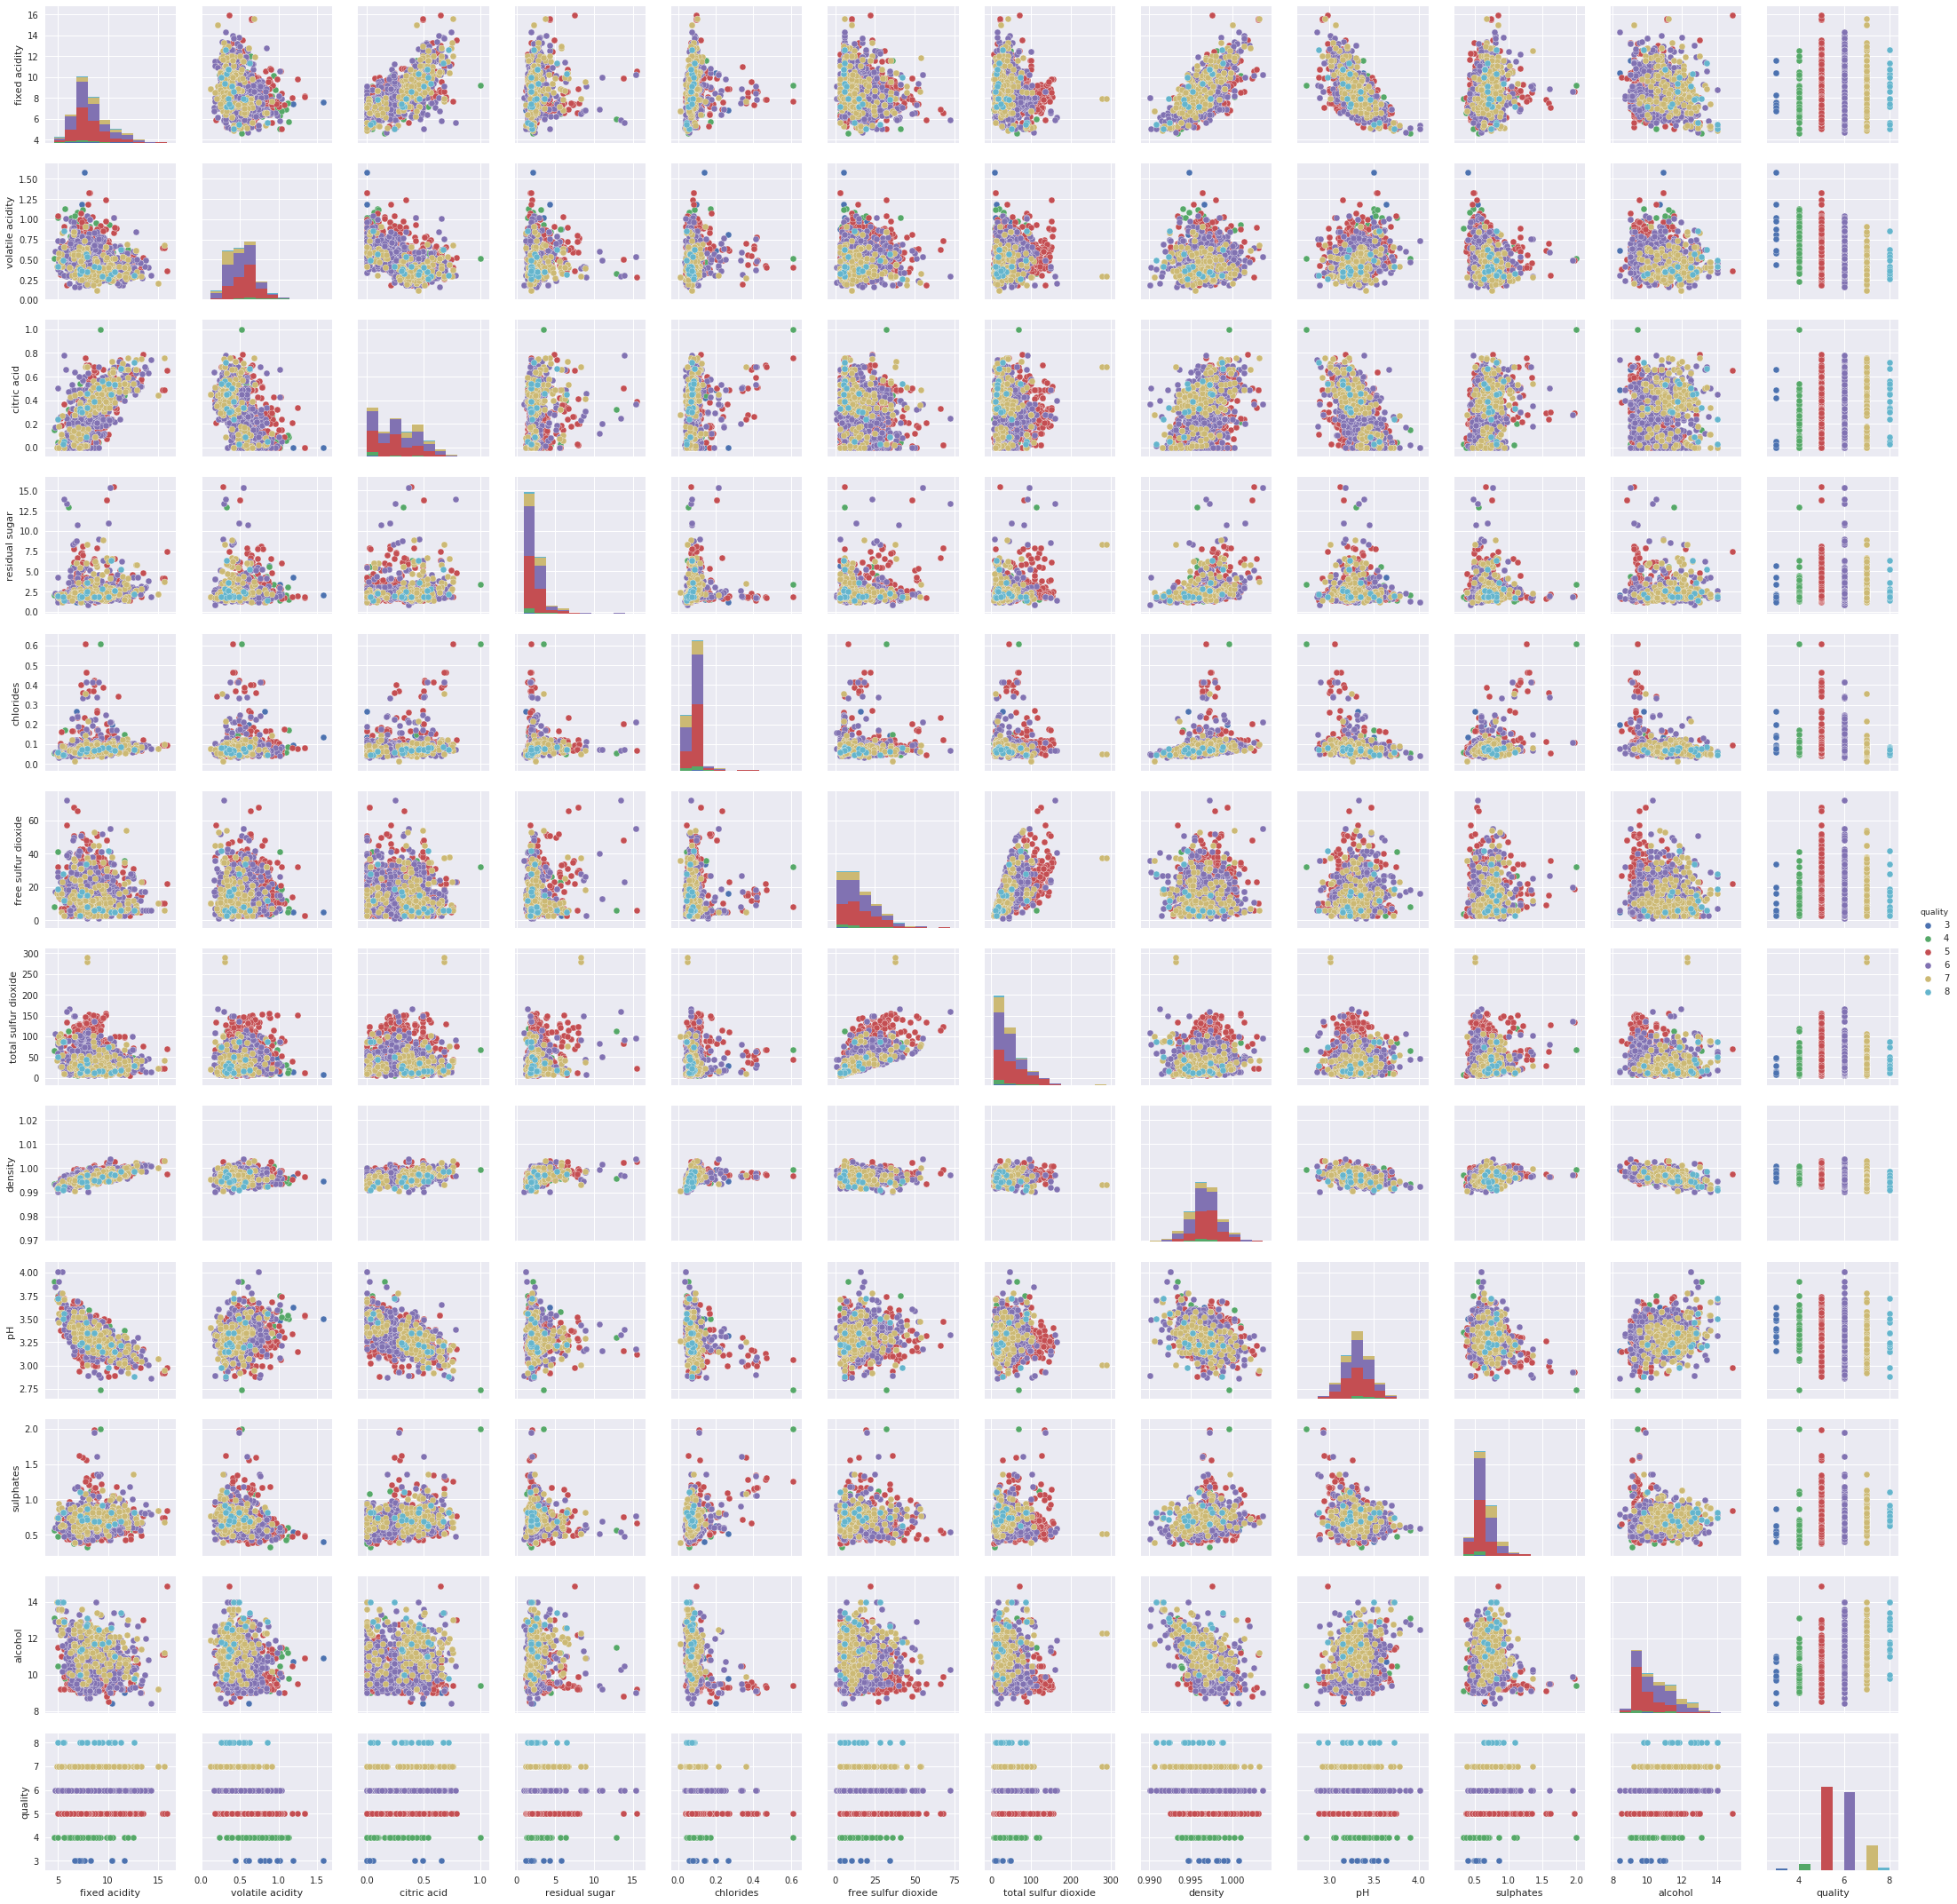

In [21]:

g1 = seaborn.pairplot(data,hue="quality")

## Preparando los datos

In [12]:
y = data["quality"].values

In [13]:
X = data.drop("quality",axis=1)

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.8, 
                                                    random_state=10,
                                                    stratify=y)

## Preprocesamiento: Normalización Z-score
Varios algoritmos de aprendizaje automático requieren que los datos posean las propiedades de una distribución normal estándar, es decir media igual a cero (μ= 0) y desviación estándar igual a uno (σ = 1).
Debido a que los atributos poseen diferentes escalas, es recomendable normalizarlos.


**Es importante aqui, usar correctamente la API Transform de scikit-learn, esta permite hacer "fit" al paso de 
preprocesamiento usando los datos de entrenamieno, de la misma forma que se hace fit en un modelo. Posteriormente
se puede "transformar" datos futuros.  En resumen:
- Hacer fit con el "Transformer" en los datos de entrenamiento(guardando los promedios y desviaciones estandar)
- Aplicar el "Transformer" a los datos de entrenamiento ( Noralizando los datos)
- Aplicar el "Transformer" a los datos de prueba( usando el mismo promedio y desviacion anteriores)**


In [15]:
from sklearn import preprocessing

# Realizar el fit en los datos de entrenamiento
std = preprocessing.StandardScaler().fit(X_train)
# Aplicando el "Transformer" a los datos de entrenamiento
X_train_std = std.transform(X_train)

In [16]:
# Aplicando el "Transform" a los datos de prueba
X_test_std = std.transform(X_test)

## Entrenando el modelo

In [17]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression(fit_intercept=True)
lr.fit(X_train_std, y_train)
y_pred = lr.predict(X_test_std)

In [18]:
sum_of_squares = ((y_test - y_pred) ** 2).sum()
res_sum_of_squares = ((y_test - y_test.mean()) ** 2).sum()
r2_score = 1 - (sum_of_squares / res_sum_of_squares)
print('R2 score: %.3f' % r2_score)

R2 score: 0.356


In [19]:
lr.score(X_test_std,y_test)

0.35573474467360033

### No muy bueno eh...

## Reducción dimensional
**Analisis de Componente Principal (PCA)**

- Encuentra nuevas características que son una combinación lineal de los datos originales
- Busca las direcciones de máxima varianza
- Captura los componentes que explican la mayor varianza
<div class="stretch"><img src="../images/PCA.png" width=50%/></div>

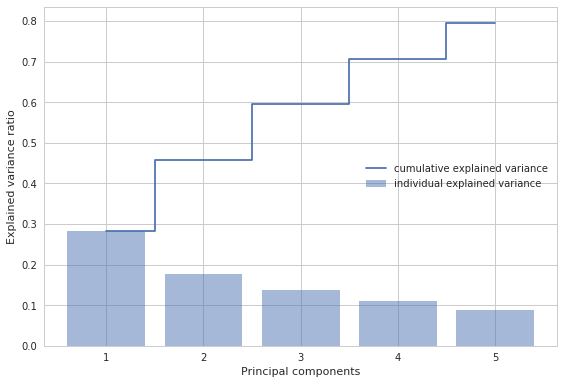

In [20]:
from sklearn.decomposition import PCA

n_c = 5
pca = PCA(n_components=n_c)

X_train_pca = pca.fit_transform(X_train_std)

var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)

idx = [i for i in range(len(var_exp))]
labels = [str(i + 1) for i in idx]
with plt.style.context('seaborn-whitegrid'):
    plt.bar(range(n_c), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(n_c), cum_var_exp, where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.xticks(idx, labels)
    plt.legend(loc='center right')
    plt.tight_layout()
    plt.show()

In [21]:
pd.DataFrame(pca.components_,columns=X_train.columns,index = ['PC-1','PC-2','PC-3','PC-4','PC-5'])

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
PC-1,0.488056,-0.238402,0.462609,0.163572,0.217132,-0.034513,0.024297,0.397072,-0.431569,0.243357,-0.110155
PC-2,-0.110434,0.299131,-0.162433,0.275025,0.168564,0.498354,0.554856,0.232897,0.002031,-0.051179,-0.393448
PC-3,-0.111766,-0.441625,0.237730,0.070030,-0.100435,0.461452,0.353559,-0.335408,0.044930,0.245734,0.456206
PC-4,-0.236166,0.079082,-0.078269,-0.302176,0.675805,-0.049843,-0.061888,-0.156202,0.039660,0.587204,-0.082016
PC-5,-0.061171,0.177206,-0.062560,0.744640,0.126100,-0.117778,-0.219990,0.187910,0.314831,0.229298,0.375872


In [22]:
X_test_pca = pca.transform(X_test_std)

lr_pca = LinearRegression(fit_intercept=True)
lr_pca.fit(X_train_pca, y_train)
lr_pca.score(X_test_pca,y_test)

0.3507325047396217

# Trabajando con Datos reales
## Problema de Clasificación 

# Desafio de Kaggle Titanic.

**El hundimiento del RMS Titanic es uno de los naufragios más infames de la historia. El 15 de abril de 1912, durante su viaje inaugural, el Titanic se hundió después de chocar con un iceberg, matando a 1502 de 2224 pasajeros y tripulación. Esta sensacional tragedia sorprendió a la comunidad internacional y condujo a mejores reglamentos de seguridad para los buques.**

**Una de las razones por las que el naufragio causó tal pérdida de vida fue que no había suficientes botes salvavidas para los pasajeros y la tripulación. Aunque hubo algún elemento de suerte involucrado en sobrevivir al hundimiento, algunos grupos de personas tenían más probabilidades de sobrevivir que otros, como mujeres, niños y la clase alta.**

**Veamos si podemos predecir que personas probablemente sobreviven usando un arbol de decisiones :D ...**

https://www.kaggle.com/c/titanic

In [23]:
titanic = pd.read_csv('titanic_train.csv')
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [24]:
# Algunos pasajeros al parecer tienen informacion faltante
titanic.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [25]:
titanic_survived = titanic["Survived"]

In [26]:
titanic.groupby('Survived').count()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Survived,,,,,,,,,,,
0,549,549,549,549,424,549,549,549,549,68,549
1,342,342,342,342,290,342,342,342,342,136,340


## Entrenar un modelo predictivo
**Arboles de decisiones**

Empecemos usando solamente los atributos iniciales que son numericos

titanic['Fare'], titanic['Pclass'] y titanic['Age'].

In [27]:
numerical_titanic = titanic[['Fare', 'Pclass', 'Age']]
numerical_titanic.count()

Fare      891
Pclass    891
Age       714
dtype: int64

usaremos la funcion de pandas fillna() para agregar la mediana de cada columna a esos valores faltantes

In [28]:
median_titanic = numerical_titanic.dropna().median()
median_titanic


Fare      15.7417
Pclass     2.0000
Age       28.0000
dtype: float64

In [29]:
train_titanic = numerical_titanic.fillna(median_titanic)
train_titanic.count()

Fare      891
Pclass    891
Age       891
dtype: int64

In [30]:
train_titanic.head(5)

,Fare,Pclass,Age
0,7.2500,3,22.0
1,71.2833,1,38.0
2,7.9250,3,26.0
3,53.1000,1,35.0
4,8.0500,3,35.0


In [31]:
X2_train, X2_test, y2_train, y2_test = train_test_split(train_titanic, titanic_survived, 
                                                    train_size=0.8, 
                                                    random_state=10,
                                                    stratify=titanic_survived)

In [32]:
from sklearn.tree import DecisionTreeClassifier ,export_graphviz

clf = DecisionTreeClassifier(random_state=0,max_depth=4,criterion="entropy")
clf.fit(X2_train,y2_train)

export_graphviz(clf, feature_names=X2_train.columns)

/home/Vilion/miniconda3/envs/test/lib/python3.6/site-packages/sklearn/tree/export.py:386: DeprecationWarning: out_file can be set to None starting from 0.18. This will be the default in 0.20.
  DeprecationWarning)


Se puede visualizar el arbol generado en la pagina http://webgraphviz.com/
Copien el contenido del archivo "tree" generado y peguenlo en el recuadro mostrado en la pagina

In [34]:
from sklearn import metrics
metrics.mean_absolute_error(y2_test, clf.predict(X2_test))

0.3016759776536313

In [35]:
metrics.confusion_matrix(y2_test,clf.predict(X2_test))

array([[97, 13],
       [41, 28]])

In [36]:
print(metrics.classification_report(y2_test,clf.predict(X2_test)))

             precision    recall  f1-score   support

          0       0.70      0.88      0.78       110
          1       0.68      0.41      0.51        69

avg / total       0.70      0.70      0.68       179

